In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [281]:
le = LabelEncoder()
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
scaler = StandardScaler()
model = LinearRegression()
model2 = LinearRegression()
poly = PolynomialFeatures(degree = 2)
rd = Ridge()
ls = Lasso()

In [282]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\winequality.csv")

In [283]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [284]:
df2 = df.copy()

In [285]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [286]:
df2.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [287]:
df2['type'] = le.fit_transform(df2['type'])

In [288]:
for i in df2.columns:
    df2[i] = df2[i].fillna(df2[i].mean())

In [289]:
df2.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [290]:
df2.shape

(6497, 13)

In [291]:
df2.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [292]:
# sns.boxplot(df2['volatile acidity']) - Has Outliers
# sns.boxplot(df2['fixed acidity']) - Has Outliers
# sns.boxplot(df2['citric acid']) - Has Outliers
# sns.boxplot(df2['chlorides']) - Has Outliers
# sns.boxplot(df2['free sulfur dioxide']) - Has Outliers
# sns.boxplot(df2['total sulfur dioxide']) - Has Outliers
# sns.boxplot(df2['total sulfur dioxide']) - Has Outliers
# sns.boxplot(df2['pH']) - Has Outliers
# sns.boxplot(df2['sulphates']) - Has Outliers
# sns.boxplot(df2['alcohol']) - Has Some Outliers
# sns.boxplot(df2['quality'])

In [293]:
def outliers(df, columns):
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df[i] = df[i].clip(upper = upperlimit,lower = lowerlimit)
    return df
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol','quality']
df2 = outliers(df2,cols)

<Axes: ylabel='volatile acidity'>

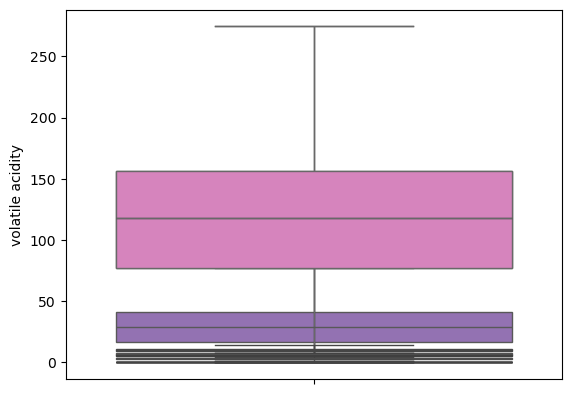

In [294]:
sns.boxplot(df2['volatile acidity'])
sns.boxplot(df2['fixed acidity'])
sns.boxplot(df2['citric acid'])
sns.boxplot(df2['chlorides'])
sns.boxplot(df2['free sulfur dioxide'])
sns.boxplot(df2['total sulfur dioxide'])
sns.boxplot(df2['total sulfur dioxide'])
sns.boxplot(df2['pH'])
sns.boxplot(df2['sulphates'])
sns.boxplot(df2['alcohol'])
sns.boxplot(df2['quality'])

In [295]:
df2 = df2.drop(columns = ['density','chlorides'])

In [296]:
x = df2.drop(columns = 'quality')
y = df2[['quality']]

In [297]:
type(df2)

pandas.core.frame.DataFrame

In [298]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 30)

In [299]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
linear = model.score(xtestscaled,ytest)

In [300]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)
model2.fit(xtrainpoly,ytrain)
polys = model2.score(xtestpoly,ytest)

In [301]:
rd.fit(xtrainscaled,ytrain)
ridge = rd.score(xtestscaled,ytest)

In [302]:
ls.fit(xtrainscaled,ytrain)
lasso = ls.score(xtestscaled,ytest)

In [304]:
print("LinearRegression:",linear)
print("Polynomial Features Regression:",polys)
print("Ridge Regression:",ridge)
print("Lasso Regression:",lasso)

LinearRegression: 0.3845816086354623
Polynomial Features Regression: 0.45369074548122146
Ridge Regression: 0.38457821369125555
Lasso Regression: -0.00898779621062884
